## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_combine = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
pharma_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = pharma_combine["Mouse ID"].value_counts()
mice_count


g989    13
y769    10
l733    10
z795    10
a685    10
        ..
f932     1
d133     1
x226     1
h428     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_id = pharma_combine.loc[:,["Mouse ID","Timepoint"]]
mice_id_time = mice_id
#mice_id["ID Count"] = mice_count
#index = combine_data.MultiIndex.from_arrays(arrays, names=("Mouse ID","Drug Regimen"))
#combine_data.groupby(level="Mouse ID").mean()

#mice=combine_data.groupby(["Mouse ID"])
#mice.head()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_timep = pharma_combine.loc[:,["Timepoint"]]
mice_timep
mice_id.groupby

<bound method DataFrame.groupby of      Mouse ID  Timepoint
0        k403          0
1        k403          5
2        k403         10
3        k403         15
4        k403         20
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1893 rows x 2 columns]>

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_id=mice_id.drop_duplicates()

mice_id

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
#mice_id_count=mice_id_count.drop_duplicates()
#mice_id_count=mice_id["Mouse ID"].count()
#pd.DataFrame({"Number Of Mice":[mice_id_count]})

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#study_results_mean=study_results['Tumor Volume (mm3)'].mean()
#print(study_results_mean)
#study_results_median=study_results['Tumor Volume (mm3)'].median()
#print(study_results_median)
#study_results_var=study_results['Tumor Volume (mm3)'].var()
#print(study_results_var)
#study_results_std=study_results['Tumor Volume (mm3)'].std()
#print(study_results_std)
#study_results_sem=study_results['Tumor Volume (mm3)'].sem()
#print(study_results_sem)

summary_stats = pharma_combine[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen")
summary_stats = summary_stats.describe()
summary_stats.head()
summary_stats

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [8]:
tumor_mean=pharma_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#print(tumor_mean)
tumor_median=pharma_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#print(tumor_median)
tumor_var=pharma_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#print(tumor_var)
tumor_std=pharma_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#print(tumor_std)
tumor_sem=pharma_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#print(tumor_sem)


sum_stat=pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median,"Variance":tumor_var,"Standard Deviation":tumor_std,"SEM":tumor_sem})
sum_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Drug_Regimen = pharma_combine.groupby("Drug Regimen")
Drug_Count = Drug_Regimen["Drug Regimen"].count()
Drug_Count = Drug_Count.astype(float)
Drug_Count.mean()

189.3

In [10]:
mice_id_count = pharma_combine.groupby(["Drug Regimen"]).count()["Mouse ID"]
#mice_id_count = mice_id_count.groupby("Drug Regimen")
mice_id_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

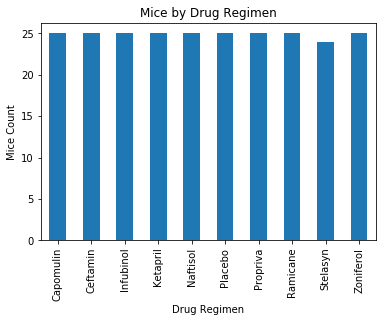

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#mice_id_count.plot(kind="bar", figsize=(10,5))
plt.title("Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
pharma_combine.groupby("Drug Regimen")["Mouse ID"].nunique().plot.bar()
#pharma_combine["Drug Regimen"].value_counts().plot.bar()

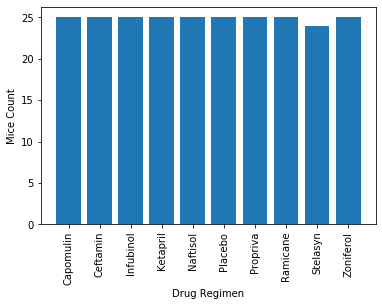

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_exp = pharma_combine.groupby("Drug Regimen")["Mouse ID"].nunique()
#mice_exp = pharma_combine["Drug Regimen"].value_counts()
plt.bar(mice_exp.index, mice_exp)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=90);

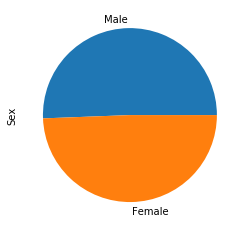

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#pharma_combine.groupby("Sex")["Mouse ID"].nunique().plot.pie(y="Female vs Male")
pharma_combine["Sex"].value_counts().plot.pie()

Text(0, 0.5, 'Mice Gender')

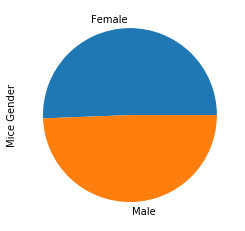

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mice_exp = pharma_combine.groupby("Sex")["Mouse ID"].nunique()
mice_exp = pharma_combine["Sex"].value_counts()
plt.pie(mice_exp, labels={"Female","Male"})
plt.ylabel("Mice Gender")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = pharma_combine.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combine_tumordata = greatest_tumor.merge(pharma_combine,on=["Mouse ID","Timepoint"],how="left")
combine_tumordata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list=["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treat_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume=combine_tumordata.loc[combine_tumordata["Drug Regimen"]==i,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_volume.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    middle_q=upper_q-lower_q
    lower_bound=lower_q-(1.5*middle_q)
    upper_bound=upper_q-(1.5*middle_q)
    finding_outliers=final_tumor_volume.loc[(final_tumor_volume<lower_bound)|(final_tumor_volume>upper_bound)]
    print(f"{i}outliers {finding_outliers}")

Capomulinoutliers 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
125    33.329098
163    46.539206
164    32.377357
170    41.581521
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicaneoutliers 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinoloutliers 0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.22673

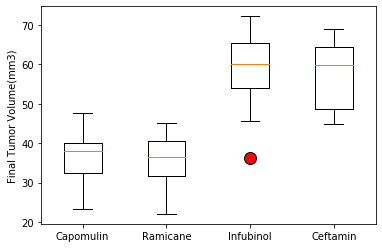

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plt=dict(markerfacecolor="red",markersize=12)
plt.boxplot(tumor_vol_data,labels=treat_list,flierprops=box_plt)
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

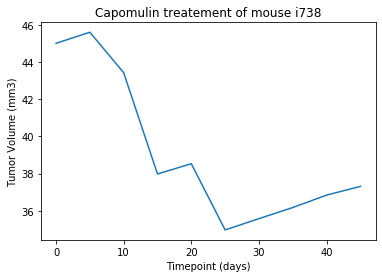

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = pharma_combine.loc[pharma_combine["Drug Regimen"] == "Capomulin"]
mouse_info = capomulin_data.loc[capomulin_data["Mouse ID"] == "i738"]
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatement of mouse i738")
plt.show()

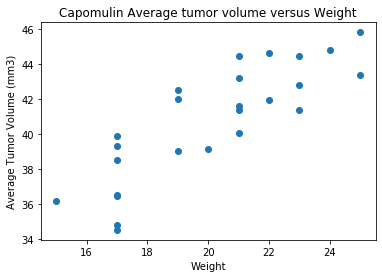

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_capo = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(average_capo["Weight (g)"], average_capo["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average tumor volume versus Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


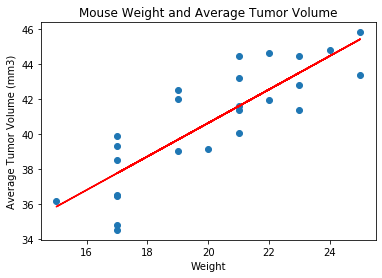

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_capo["Weight (g)"], average_capo["Tumor Volume (mm3)"])[0],2)
model=st.linregress(average_capo["Weight (g)"], average_capo["Tumor Volume (mm3)"])
yvalues = average_capo["Weight (g)"]*model[0]+model[1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(average_capo["Weight (g)"],average_capo["Tumor Volume (mm3)"])
plt.plot(average_capo["Weight (g)"],yvalues,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight and Average Tumor Volume")
plt.show()